**门控循环单元（GRU）：**  
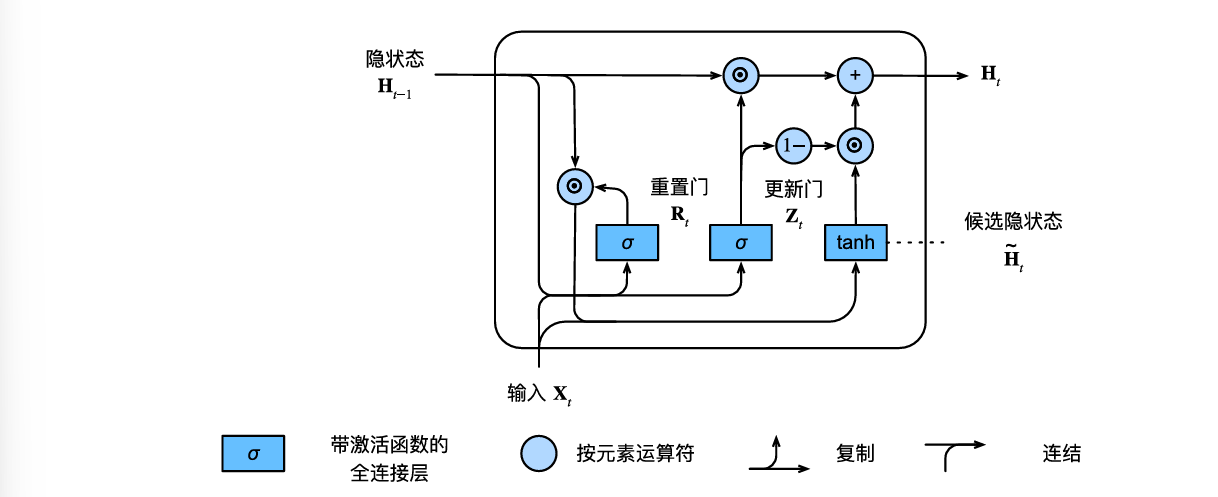

**重置门:**  
$$ r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r) $$
**更新门:**
$$z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z) $$
**候选隐藏状态:**
$$\tilde{h}_t = \tanh(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h)$$
**最终隐藏状态:**
$$h_t = (1 - z_t) \odot \tilde{h}_t + z_t \odot h_{t-1}$$

$R_t$ 和 $Z_t$ 都是根据过去的状态 $H_{t-1}$ 和当前输入 $X_t$ 计算得到的 【0,1】 之间的量。
$R_t$ 首先与 $H_{t-1}$ 进行元素积，由于 $R_t$ 内部都是 【0,1】 的变量，因此是对过去的状态 $H_{t-1}$ 进行一次选择，$R_t$ 在某个位置的值越趋近于0，则表示这个位置的过去信息越倾向于被丢弃，反之保留。随后与 $X_t$ 一起构成候选隐藏变量 $\tilde{H}_t$。同样由于 $R_t$ 的值在【0,1】中，它只会削弱过去的状态，而不会增强，因此被称为遗忘门（或重置门，重置过去的状态）。   
$Z_t$ 被称为更新门，因为它控制了隐藏状态的更新。假如$Z_t$全为1，则 $H_t$ 将完全保留上一个时间的状态 $H_{t-1}$；反之，则全盘采用当前时刻的候选隐藏变量 $\tilde{H}_t$。   
$Z_t$ 实际上是对当前进行选择，根据老师的例子，如果一个序列中已经有很多的“猫”，那么再输入猫，实际上对于网络的正收益不大，可以抛弃，而 $R_t$ 只能选择过去，不能抛弃当前，而 $Z_t$ 可以。
总而言之，GRU通过两个门控网络，根据过去状态和当前输入，一方面对过去状态进行选择，一方面对当前状态也进行选择。

**LSTM(长短期记忆网络）:**   
**遗忘门：**   
决定丢弃多少旧记忆      
$$f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f)$$
**输入门：**   
决定当前输入信息中哪些写入记忆
$$i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)$$
**候选记忆：**   
对当前输入的候选状态（信息内容）
$$\tilde{c}_t = \tanh(W_c x_t + U_c h_{t-1} + b_c)$$
**更新单元状态：**   
结合遗忘旧的和添加新的记忆。
$$c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t$$
**输出门：**   
决定输出多少当前隐藏状态。
$$o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o)$$
**最终隐藏状态：**   
最终输出
$$h_t = o_t \odot \tanh(c_t)$$


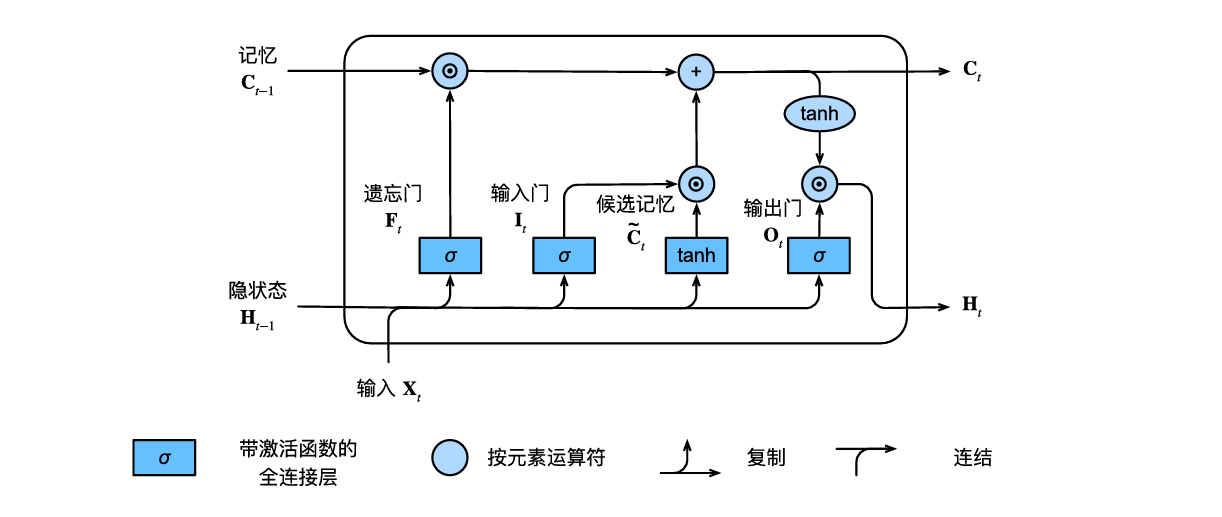

**GRU**可能因为没有额外的记忆单元，只靠 $h_t$ 更新，在特别长的序列中更容易遗忘前面的信息。   
所以尽管训练速度稍差，但是在特别长的序列任务中LSTM表现更佳
